#Non-Linear Classification with SVM

# 1. DATA SET AND VISUALIZATION FUNCTION

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
import numpy as np

X, y = make_moons (n_samples = 500, noise = 0.15, random_state = 49)
y = y*2-1.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

import matplotlib.pyplot as plt

def plot_svm (clf, X, y, axes=[-2, 3, -2, 2]):
    """
    Generate a simple plot of SVM including the decision boundary, margin, and its training data

    Parameters
    ----------
    clf: your classifier handle
    X: feature matrix shape(m_samples, n_features)
    y: label vector shape(m_samples, )
    axes: (optional) the axes of the plot in format [xmin, xmax, ymin, ymax]
    """
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s,x1s)
    X_mesh = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_mesh).reshape(x0.shape)
    y_decision = clf.decision_function(X_mesh).reshape(x0.shape)

    plt.figsize=(16, 9)
    plt.plot(X[:, 0][y==-1], X[:, 1][y==-1], "bo", label="Class -1")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "go", label="Class +1")
    plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=80, c="r", label="Support Vectors")
    plt.contourf(x0,x1, y_pred, cmap = plt.cm.brg, alpha = 0.1)
    plt.contourf(x0,x1, y_decision, cmap = plt.cm.brg, alpha = 0.2)
    plt.contour(x0, x1, y_decision, colors='k',
                 levels=[-1, 0, 1], alpha=0.5,
                 linestyles=['--', '-', '--'])
    plt.legend(loc="lower right")
    plt.axis("auto")

    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

# 2. TRAIN SVM FOR CLASSIFICATION TASK


------------ Linear SVM ------------
Best Hyperparameter: {'C': 2}
Confusion Matrix:
[[34 11]
 [ 5 50]]
Recall:
0.9090909090909091
Precision:
0.819672131147541


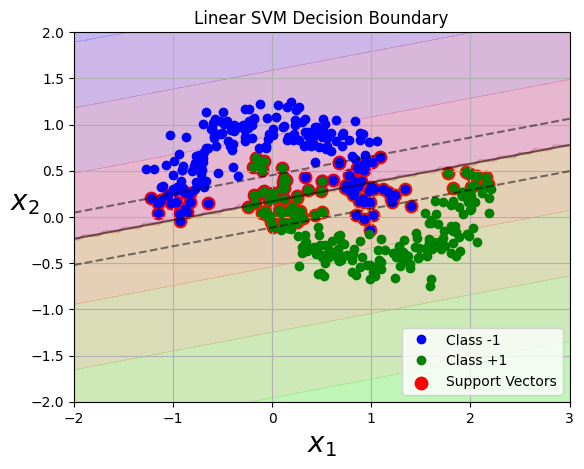

------------ Polynomial SVM ------------
Best Hyperparameter: {'C': 3, 'coef0': 2, 'degree': 3}
Confusion Matrix:
[[42  3]
 [ 0 55]]
Recall:
1.0
Precision:
0.9482758620689655


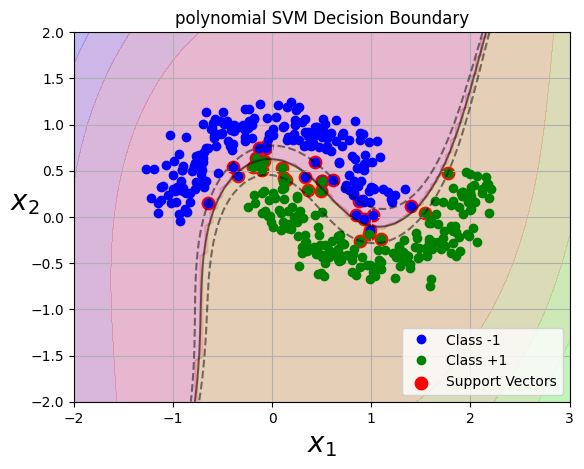

------------ Gaussian RBF SVM ------------
Best Hyperparameter: {'C': 600, 'gamma': 0.125}
Confusion Matrix:
[[42  3]
 [ 0 55]]
Recall:
1.0
Precision:
0.9482758620689655


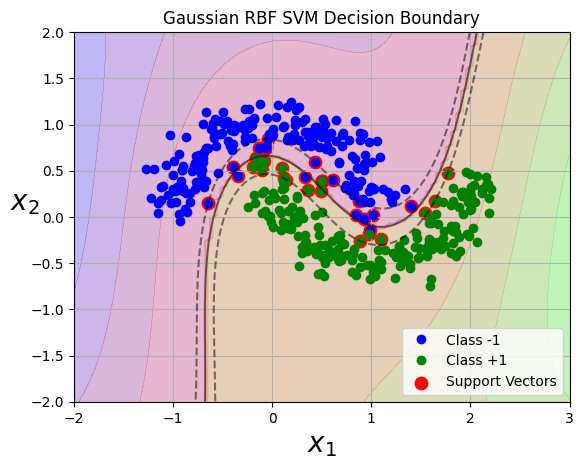

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

print("------------ Linear SVM ------------")

linear_svm_clf = SVC(kernel='linear')

linear_grid = {
    'C': [2, 2.5, 3, 3.5],
}

linear_grid = GridSearchCV(linear_svm_clf, linear_grid, cv=5)
linear_grid.fit(X_train, y_train)
linear_hypertuned = linear_grid.best_params_
print("Best Hyperparameter:", linear_hypertuned)

linear_svm_clf = SVC(kernel='linear', C=linear_hypertuned['C'])
linear_svm_clf.fit(X_train, y_train)

linear_predictions = linear_svm_clf.predict(X_test)
confusion_matrix_variable = confusion_matrix(y_test, linear_predictions)
recall = recall_score(y_test, linear_predictions)
precision = precision_score(y_test, linear_predictions)
print("Confusion Matrix:")
print(confusion_matrix_variable)
print("Recall:")
print(recall)
print("Precision:")
print(precision)

plot_svm(linear_svm_clf, X_train, y_train)
plt.title("Linear SVM Decision Boundary")
plt.show()

print("------------ Polynomial SVM ------------")

polynomial_svm_clf = SVC(kernel='poly', degree=3)

polynomial_grid = {
    'C': [1, 2, 3, 4, 5],
    'degree': [2, 3, 4, 5],
    'coef0': [1, 2, 3, 5, 10, 15, 20]
}

polynomial_grid = GridSearchCV(polynomial_svm_clf, polynomial_grid, cv=5)
polynomial_grid.fit(X_train, y_train)
polynomial_hypertuned = polynomial_grid.best_params_
print("Best Hyperparameter:", polynomial_hypertuned)

polynomial_svm_clf = SVC(kernel='poly', C=polynomial_hypertuned['C'], degree=polynomial_hypertuned['degree'], coef0=polynomial_hypertuned['coef0'])
polynomial_svm_clf.fit(X_train, y_train)

polynomial_predictions = polynomial_svm_clf.predict(X_test)
confusion_matrix_variable = confusion_matrix(y_test, polynomial_predictions)
recall = recall_score(y_test, polynomial_predictions)
precision = precision_score(y_test, polynomial_predictions)
print("Confusion Matrix:")
print(confusion_matrix_variable)
print("Recall:")
print(recall)
print("Precision:")
print(precision)

plot_svm(polynomial_svm_clf, X_train, y_train)
plt.title("polynomial SVM Decision Boundary")
plt.show()

print("------------ Gaussian RBF SVM ------------")

rbf_svm_clf = SVC(kernel='rbf')

rbf_grid = {
    'C': [300, 400, 500, 600, 700, 800],
    'gamma': [0.05, 0.075, 0.1, .125, 1.5],
}

rbf_grid = GridSearchCV(rbf_svm_clf, rbf_grid, cv=5)
rbf_grid.fit(X_train, y_train)
rbf_hypertuned = rbf_grid.best_params_
print("Best Hyperparameter:", rbf_hypertuned)

rbf_svm_clf = SVC(kernel='rbf', C=rbf_hypertuned['C'], gamma=rbf_hypertuned['gamma'])

rbf_svm_clf.fit(X_train, y_train)

rbf_predictions = rbf_svm_clf.predict(X_test)
confusion_matrix_variable = confusion_matrix(y_test, rbf_predictions)
recall = recall_score(y_test, rbf_predictions)
precision = precision_score(y_test, rbf_predictions)
print("Confusion Matrix:")
print(confusion_matrix_variable)
print("Recall:")
print(recall)
print("Precision:")
print(precision)

plot_svm(rbf_svm_clf, X_train, y_train)
plt.title("Gaussian RBF SVM Decision Boundary")
plt.show()

#3. IMPLEMENT MY OWN NON-LINEAR SVM

In [ ]:
def linear_kernel(u, v):
    return np.dot(u, v)

def polynomial_kernel(u, v, p=3):
    return (np.dot(u, v) + 1) ** p

def rbf_kernel(u, v, gamma=0.125):
    return np.exp(-pow(np.linalg.norm(u-v), 2)*gamma)

In [ ]:
import cvxopt
import cvxopt.solvers
from sklearn.base import BaseEstimator, ClassifierMixin

class MySVM(BaseEstimator, ClassifierMixin):
    """The Implementation of the SVM class"""

    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)
        self.K = None
        self.a = None
        self.support_vectors_ = []
        self.labels = []
        self.lagrange = []

    def fit(self, X, y=None):
        """
        Train SVM based on the training set
        Parameters
        ----------
        X: feature matrix shape(m_samples, n_features)
        y: label vector shape(m_samples, )
        """

        m_samples, n_features = X.shape
        K = np.zeros((m_samples, m_samples))
        for i in range(m_samples):
            for j in range(m_samples):
                K[i,j] = self.kernel(X[i], X[j])
        self.K = K

        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(m_samples) * -1)
        A = cvxopt.matrix(y, (1,m_samples))
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(m_samples) * -1))
            h = cvxopt.matrix(np.zeros(m_samples))
        else:
            tmp1 = np.diag(np.ones(m_samples) * -1)
            tmp2 = np.identity(m_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(m_samples)
            tmp2 = np.ones(m_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        a = np.ravel(solution['x'])
        sv = a > 1e-3
        for i in range(m_samples):
          if sv[i]:
            self.support_vectors_.append(X[i])
            self.labels.append(y[i])
            self.lagrange.append(a[i])

        self.support_vectors_ = np.array(self.support_vectors_)

        print("%d support vectors out of %d points" % (sum(sv), m_samples))

        if self.kernel == linear_kernel:
            self.w = np.dot(a * y, X)
        else:
            self.w =  None

        self.b = 0
        for i in range(len(self.support_vectors_)):
          intermediateSum = 0
          for j in range(len(self.lagrange)):
            intermediateSum += self.lagrange[j] * self.labels[j] * self.kernel(self.support_vectors_[i], self.support_vectors_[j])
          self.b += self.labels[i] - intermediateSum
        self.b /= len(self.support_vectors_)

    def decision_function(self, X):
        """The decision function is essentially w^T . x + b"""
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
              prediction = 0
              for j in range(len(self.support_vectors_)):
                prediction += self.lagrange[j] * self.labels[j] * self.kernel(self.support_vectors_[j], X[i])
              y_predict[i] = prediction + self.b
            return y_predict

    def predict(self, X):
        """Predicts -1,+1 based on the sign of the decision function"""
        return np.sign(self.decision_function(X))




# 4. COMPARING MY IMPLEMENTATION TO THE STANDARD LIBRARY

------------ Linear SVM ------------
     pcost       dcost       gap    pres   dres
 0: -2.0467e+02 -1.9618e+03  6e+03  1e+00  1e-14
 1: -1.6204e+02 -8.7274e+02  9e+02  9e-02  9e-15
 2: -1.7127e+02 -3.1706e+02  2e+02  2e-02  8e-15
 3: -1.9556e+02 -2.4229e+02  5e+01  4e-03  8e-15
 4: -2.0313e+02 -2.2786e+02  3e+01  2e-03  8e-15
 5: -2.0736e+02 -2.1999e+02  1e+01  6e-04  8e-15
 6: -2.0965e+02 -2.1632e+02  7e+00  3e-04  8e-15
 7: -2.1133e+02 -2.1369e+02  2e+00  6e-05  1e-14
 8: -2.1211e+02 -2.1265e+02  5e-01  1e-05  9e-15
 9: -2.1228e+02 -2.1242e+02  1e-01  3e-07  1e-14
10: -2.1235e+02 -2.1235e+02  2e-03  3e-09  1e-14
11: -2.1235e+02 -2.1235e+02  2e-05  3e-11  1e-14
Optimal solution found.
111 support vectors out of 400 points
Confusion Matrix:
[[35 10]
 [ 5 50]]
Recall:
0.9090909090909091
Precision:
0.8333333333333334


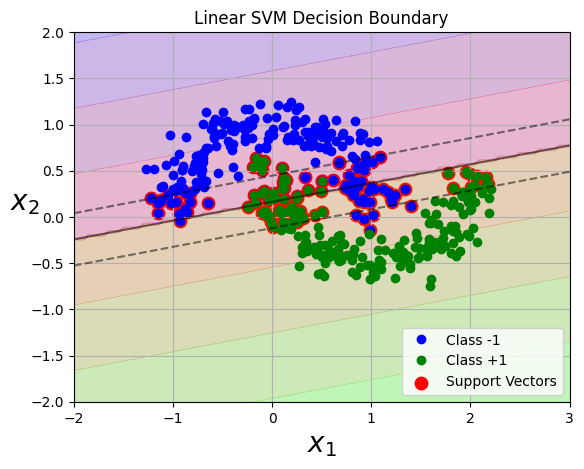

------------ Polynomial SVM ------------
     pcost       dcost       gap    pres   dres
 0: -1.4288e+02 -4.6141e+03  2e+04  2e+00  2e-13
 1: -9.1643e+01 -2.2584e+03  4e+03  2e-01  1e-13
 2: -2.8408e+01 -5.0703e+02  7e+02  3e-02  8e-14
 3: -3.3029e+01 -1.6901e+02  2e+02  7e-03  7e-14
 4: -3.6952e+01 -1.5505e+02  1e+02  5e-03  5e-14
 5: -4.7726e+01 -1.0771e+02  7e+01  2e-03  5e-14
 6: -5.4917e+01 -8.3159e+01  3e+01  2e-04  5e-14
 7: -5.7582e+01 -7.9304e+01  2e+01  1e-04  5e-14
 8: -5.8214e+01 -7.7891e+01  2e+01  9e-05  5e-14
 9: -5.8814e+01 -7.6601e+01  2e+01  5e-05  5e-14
10: -6.0169e+01 -7.4629e+01  1e+01  3e-05  5e-14
11: -5.9906e+01 -7.4071e+01  1e+01  3e-05  4e-14
12: -6.2025e+01 -7.0974e+01  9e+00  6e-06  5e-14
13: -6.5461e+01 -6.6496e+01  1e+00  5e-07  5e-14
14: -6.5879e+01 -6.5946e+01  7e-02  3e-08  6e-14
15: -6.5908e+01 -6.5909e+01  1e-03  4e-10  6e-14
16: -6.5908e+01 -6.5908e+01  1e-05  4e-12  7e-14
Optimal solution found.
32 support vectors out of 400 points
Confusion Matrix:

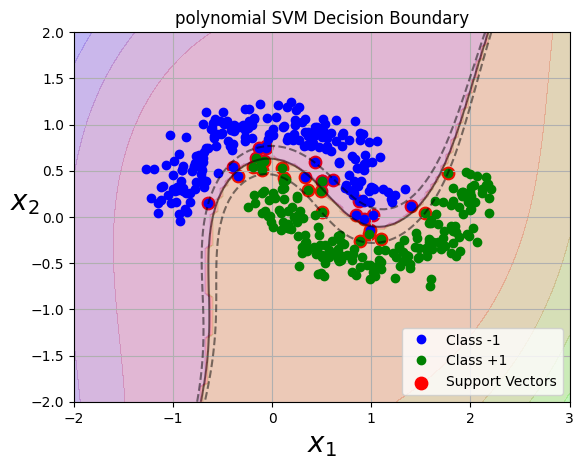

------------ Gaussian RBF SVM ------------
     pcost       dcost       gap    pres   dres
 0:  1.9380e+06 -5.2427e+07  9e+07  2e-01  1e-12
 1:  1.3946e+06 -7.6119e+06  1e+07  2e-02  4e-12
 2:  3.6416e+05 -1.6463e+06  2e+06  2e-03  1e-12
 3:  1.1722e+05 -6.3574e+05  8e+05  6e-04  7e-13
 4:  5.3499e+04 -3.2849e+05  4e+05  3e-04  5e-13
 5:  1.6590e+04 -1.3695e+05  2e+05  8e-05  5e-13
 6:  6.1861e+03 -9.1242e+04  1e+05  5e-05  5e-13
 7: -2.7559e+03 -3.9147e+04  4e+04  1e-05  5e-13
 8: -4.8696e+03 -3.6037e+04  3e+04  8e-06  5e-13
 9: -7.9809e+03 -2.6796e+04  2e+04  4e-06  5e-13
10: -1.0025e+04 -2.1825e+04  1e+04  2e-06  5e-13
11: -1.1245e+04 -1.8983e+04  8e+03  1e-06  5e-13
12: -1.1903e+04 -1.7561e+04  6e+03  6e-07  6e-13
13: -1.2490e+04 -1.5872e+04  3e+03  2e-07  6e-13
14: -1.2799e+04 -1.5355e+04  3e+03  6e-08  6e-13
15: -1.3401e+04 -1.4433e+04  1e+03  2e-08  7e-13
16: -1.3534e+04 -1.4163e+04  6e+02  9e-09  6e-13
17: -1.3647e+04 -1.3988e+04  3e+02  3e-13  9e-13
18: -1.3763e+04 -1.3849e+04

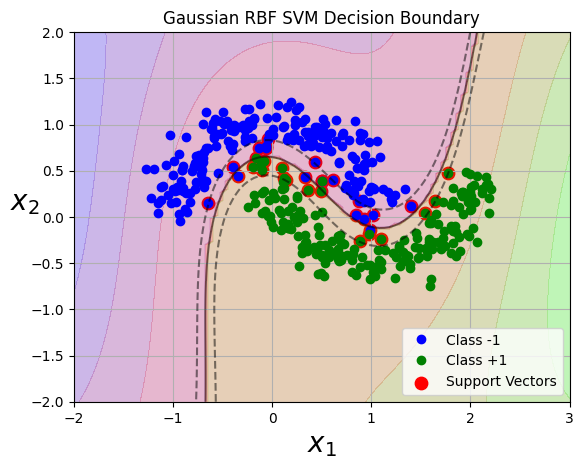

In [ ]:
print("------------ Linear SVM ------------")

linear_svm_clf = MySVM(kernel=linear_kernel, C=2)
linear_svm_clf.fit(X_train, y_train)
linear_predictions = linear_svm_clf.predict(X_test)
confusion_matrix_variable = confusion_matrix(y_test, linear_predictions)
recall = recall_score(y_test, linear_predictions)
precision = precision_score(y_test, linear_predictions)
print("Confusion Matrix:")
print(confusion_matrix_variable)
print("Recall:")
print(recall)
print("Precision:")
print(precision)

plot_svm(linear_svm_clf, X_train, y_train)
plt.title("Linear SVM Decision Boundary")
plt.show()

print("------------ Polynomial SVM ------------")

polynomial_svm_clf = MySVM(kernel=polynomial_kernel, C=3)
polynomial_svm_clf.fit(X_train, y_train)

polynomial_predictions = polynomial_svm_clf.predict(X_test)
confusion_matrix_variable = confusion_matrix(y_test, polynomial_predictions)
recall = recall_score(y_test, polynomial_predictions)
precision = precision_score(y_test, polynomial_predictions)
print("Confusion Matrix:")
print(confusion_matrix_variable)
print("Recall:")
print(recall)
print("Precision:")
print(precision)

plot_svm(polynomial_svm_clf, X_train, y_train)
plt.title("polynomial SVM Decision Boundary")
plt.show()

print("------------ Gaussian RBF SVM ------------")

rbf_svm_clf = MySVM(kernel=rbf_kernel, C=600)
rbf_svm_clf.fit(X_train, y_train)

rbf_predictions = rbf_svm_clf.predict(X_test)
confusion_matrix_variable = confusion_matrix(y_test, rbf_predictions)
recall = recall_score(y_test, rbf_predictions)
precision = precision_score(y_test, rbf_predictions)
print("Confusion Matrix:")
print(confusion_matrix_variable)
print("Recall:")
print(recall)
print("Precision:")
print(precision)

plot_svm(rbf_svm_clf, X_train, y_train)
plt.title("Gaussian RBF SVM Decision Boundary")
plt.show()

My class of SVM is exactly the same as the library. The confusion matrix, precision, and recall are all the same. Except for linear which my implementation is somehow ever so slightly better than the librarys. This means that I should be using the same hyperparameters as I finetuned those during the second task. Overall, this was an extremely tedious assignment implementing my own algorithm. Luckily many trips to OH helped me out and now I feel like I have a much better understanding of SVM and how it works.